# Лабораторна робота 3
### Пушкар Максим, Варіант 11

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

### Робота з даними

Опис даних: https://guoguibing.github.io/librec/datasets.html, CiaoDVD

Самi данi: https://guoguibing.github.io/librec/datasets/CiaoDVD.zip

In [334]:
# https://proceedings.neurips.cc/paper/2007/file/d7322ed717dedf1eb4e6e52a37ea7bcd-Paper.pdf
# https://towardsdatascience.com/pmf-for-recommender-systems-cbaf20f102f0

In [251]:
movie_ratings = pd.read_table('movie-ratings.txt', sep=",", 
                   names=["userID", "movieID", "genreID", "reviewID", "movieRating", "date"])
# dtype={"userID":int, "movieID", "genreID", "reviewID", "movieRating", "date"})
# type(df["reviewID"][1])
movie_ratings.head()

,userID,movieID,genreID,reviewID,movieRating,date
0,1,1,1,1,5,2000-07-12
1,2,1,1,2,5,2000-07-12
2,3,1,1,3,5,2000-07-12
3,4,1,1,4,4,2000-07-12
4,5,1,1,5,4,2000-07-12


In [252]:
df = movie_ratings.drop(columns=["genreID", "reviewID", "date"])
df

,userID,movieID,movieRating
0,1,1,5
1,2,1,5
2,3,1,5
3,4,1,4
4,5,1,4
...,...,...,...
72660,4808,16117,5
72661,119,16118,3
72662,5850,16119,5
72663,119,16120,3


В документації даних не знайшов границі для movieRating. Якщо він може бути 0, то з цим прийдеться щось робити, адже теорія, яку ми застосовуємо, вимагає додатності даних в матриці. 

In [253]:
rating_min, rating_max = min(df["movieRating"]), max(df["movieRating"])
rating_min, rating_max

(1, 5)

Чудово, додаткової роботи робити не потрібно.

In [254]:
user_list = set(df["userID"])
movie_list = set(df["movieID"])
print(len(user_list))
print(len(movie_list))

17615
16121


In [255]:
# намагаємося створити матрицю даних

M = pd.DataFrame(index=movie_list, columns=user_list, dtype=float)
M

,1,2,3,4,5,6,7,8,9,10,...,17606,17607,17608,17609,17610,17611,17612,17613,17614,17615
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html
for _, row in df.iterrows():
    M.loc[row["movieID"], row["userID"]] = row["movieRating"]
M

,1,2,3,4,5,6,7,8,9,10,...,17606,17607,17608,17609,17610,17611,17612,17613,17614,17615
1,5.0,5.0,5.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Можна наочно перевірити, що все спрацювало правильно. Другий фільм першим оцінив 47й, і так і є, якщо вивести всі оцінки 47го, це можна побачити:

In [257]:
M[47]

1        NaN
2        4.0
3        NaN
4        NaN
5        NaN
        ... 
16117    NaN
16118    NaN
16119    NaN
16120    NaN
16121    NaN
Name: 47, Length: 16121, dtype: float64

In [258]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16121 entries, 1 to 16121
Columns: 17615 entries, 1 to 17615
dtypes: float64(17615)
memory usage: 2.1 GB


In [259]:
del M

Цю матрицю прийдеться прийдеться урізати, бо для великих d наш код не зможе працювати з 2 гігабайтами даних взагалі, а якщо і зможе, то буде працювати неймовірно довго. Тому ми виберемо найбільш активних юзерів та найбільш популярні фільми, щоб не загубити дуже багато суттєвих даних при урізанні. 

Обиратимемо n найбільш оцінюваних фільмів:

In [260]:
n = 1000

In [261]:
def create_dct(lst):
    dct = {}
    for i in lst:
        if i in dct.keys():
            dct[i] += 1
        else:
            dct[i] = 1
    return dct

In [262]:
top_movies = create_dct(df["movieID"])
top_movies = sorted(top_movies.items(), key=lambda item: item[1], reverse=True)
top_movies = pd.DataFrame(top_movies, columns=["movieID","counter"])
top_movies.head(10)

,movieID,counter
0,6119,433
1,6068,383
2,12105,297
3,7584,234
4,6159,231
5,13199,213
6,53,210
7,12975,207
8,14428,205
9,7332,202


In [263]:
selected_movies = top_movies.head(n)
selected_movies_ids = selected_movies["movieID"]

Тепер обираємо n найбільш активних користувачів.

In [264]:
top_users = create_dct(df["userID"])
top_users = sorted(top_users.items(), key=lambda item: item[1], reverse=True)
top_users = pd.DataFrame(top_users, columns=["userID","counter"])
top_users.head(10)

,userID,counter
0,1075,1106
1,200,861
2,40,760
3,1607,619
4,356,615
5,1343,587
6,119,553
7,62,450
8,1333,444
9,161,406


In [265]:
selected_users = top_users.head(n)
selected_users_ids = selected_users["userID"]

Тепер обираємо оцінки для обраних фільмів, які були зроблені обраними користувачами

In [266]:
selected_ratings = df[ df["movieID"].isin(selected_movies_ids) & df["userID"].isin(selected_users_ids) ]
selected_ratings

,userID,movieID,movieRating
0,1,1,5
1,2,1,5
3,4,1,4
4,5,1,4
5,6,1,5
...,...,...,...
72563,62,16050,5
72565,1974,16050,4
72566,220,16050,3
72567,1575,16050,5


In [267]:
M = pd.DataFrame(index=selected_movies_ids, columns=selected_users_ids, dtype=float)
for _, row in selected_ratings.iterrows():
    M.loc[row["movieID"], row["userID"]] = row["movieRating"]
M

userID,1075,200,40,1607,356,1343,119,62,1333,161,...,3767,3826,3887,3989,4083,4099,4112,4199,4201,4228
movieID,,,,,,,,,,,,,,,,,,,,,
6119,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7622,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7702,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 6119 to 7794
Columns: 1000 entries, 1075 to 4228
dtypes: float64(1000)
memory usage: 7.7 MB


In [269]:
del M

### Probabilistic Matrix Factorization

Нарешті ми підійшли до основної частини задачі, попередня робота була важливою, але підготовчою роботою з даними, щоб на них можна було б тестувати наступний метод.

Ми будемо емплементувати алгоритм із лекцій під назвою Probabilistic Matrix Factorization (PMF). Маємо на меті розкласти 
$$ R = U^T V $$ 
де $R$ є великою матрицею даних з пропусками, а $U, V$ є матрицями розміру $ d \times n_1 $ та $ d \times n_2 $ відповідно, які ми маємо на меті знайти за допомогою ймовірносних методів. Тут $d$ є параметром, який ми будемо змінювати, разом із іншими двома $\lambda, \sigma^2$, які відповідають за випадковий розподіл, на якому ми вирішуємо задачу.

Спершу ми створимо тренувальну та тестову вибірки, а далі напишемо функцію для реалізації алгоритму.

In [272]:
ratings_train, ratings_test = train_test_split(selected_ratings, shuffle=True, train_size=0.8)

In [324]:
X_train = pd.DataFrame(index=selected_movies_ids, columns=selected_users_ids, dtype=float)
for _, row in ratings_train.iterrows():
    X_train.loc[row["movieID"], row["userID"]] = row["movieRating"]

X_test = pd.DataFrame(index=selected_movies_ids, columns=selected_users_ids, dtype=float)
for _, row in ratings_test.iterrows():
    X_test.loc[row["movieID"], row["userID"]] = row["movieRating"]

In [361]:
def pmf(M_train, M_test, d, la=1, sig=1, eps=0.001, max_iter=20, verbose=True):
    # початкові параметри
    M = M_train.copy()
    M = M.values
    n_1, n_2 = M.shape
    
    # збираємо відхилення на кожному кроці для подальшої візуалізації
    mse_train_list = []
    mse_test_list = []
    
    # перший випадковий член послідовності (U, V)
    V = np.random.normal(0, 1/la, size=(d, n_2))
    
    # відповідає за виведення інформації на екран у вигляді print() для дебагу
    if verbose:
        print("step 0:")
        print()
    
    # головний цикл
    for w in range(max_iter):
        # генеруємо U за формулою з лекцій
        U = np.zeros(shape=(d, n_1))
        for i in range(n_1):
            Vj = V[:, M[i, :] > 0]
            part_0 = np.dot(Vj, Vj.T)
            part_1 = np.linalg.inv(la * sig**2 * np.identity(d) + part_0)
            part_2 = np.dot(M[i, M[i, :] > 0], Vj.T)
            U[:,i] = np.dot(part_1, part_2)
        
        # генеруємо V
        V = np.zeros(shape=(d, n_2))
        for j in range(n_2):
            Ui = U[:, M[:, j] > 0]
            part_0 = np.dot(Ui, Ui.T)
            part_1 = np.linalg.inv(la * sig**2 * np.identity(d) + part_0)
            part_2 = np.dot(M[M[:, j] > 0, j], Ui.T)
            V[:, j] = np.dot(part_1, part_2)
        
        # за побудованими U, V будуємо predict для порівняння якості за допомогою mse
        M_predict = np.dot(U.T, V)
        # округлюємо predict до можливих даних із матриці
        M_predict[M_predict > 5] = 5
        M = np.around(M, decimals=0)
        
        # шукаємо відхилення на тих елементах, на яких M_train не дорівнює None
        mse_train = mse(M_train.values[M_train > 0], M_predict[M_train > 0])
        mse_test = mse(M_test.values[M_test > 0], M_predict[M_test > 0])
        
        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
        
        if verbose:
            print(f"step {w+1}:")
            print(f"mean squared eroor train : {mse_train}")
            print(f"mean squared eroor test : {mse_test}")
            print()
            
    return U, V, mse_train_list, mse_test_list   

In [365]:
# приклад послідовності округлень для M_predict
w = np.array([[0.4, 2, 3.5], [4, 5.6, 6], [7, 8, 9]])
w[w>5] = 5
w = np.around(w, decimals=0)
w

array([[0., 2., 4.],
       [4., 5., 5.],
       [5., 5., 5.]])

In [353]:
U, V, mse_train, mse_test = pmf(X_train, X_test, d=5)

step 0:

step 1:
mean squared eroor train : 6.338111400686924
mean squared eroor test : 21.138720680421734

step 2:
mean squared eroor train : 1.3089658958320125
mean squared eroor test : 6.725161401611361

step 3:
mean squared eroor train : 0.44637685238257707
mean squared eroor test : 2.3012913411275417

step 4:
mean squared eroor train : 0.3245942327970247
mean squared eroor test : 1.692848979278345

step 5:
mean squared eroor train : 0.2779656411614169
mean squared eroor test : 1.531398013198898

step 6:
mean squared eroor train : 0.25300320369449014
mean squared eroor test : 1.4645399476660603

step 7:
mean squared eroor train : 0.2375723913725032
mean squared eroor test : 1.4323207564239016

step 8:
mean squared eroor train : 0.22746630148180783
mean squared eroor test : 1.4173143434070696

step 9:
mean squared eroor train : 0.22025831596194098
mean squared eroor test : 1.4112526337644558

step 10:
mean squared eroor train : 0.2148792772183497
mean squared eroor test : 1.40948229

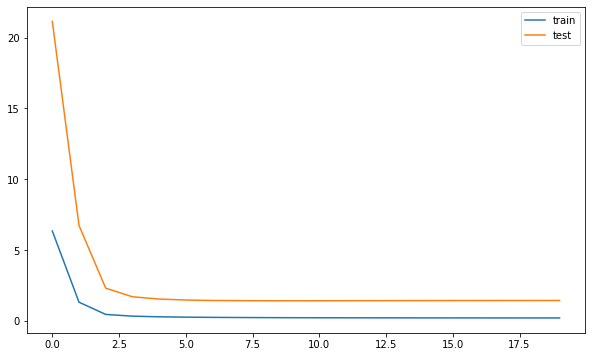

In [354]:
plt.plot(mse_train, label='train')
plt.plot(mse_test, label='test')
plt.legend()
plt.show()

In [355]:
U, V, mse_train, mse_test = pmf(X_train, X_test, d=10)

step 0:

step 1:
mean squared eroor train : 3.128470321871807
mean squared eroor test : 28.00434423868802

step 2:
mean squared eroor train : 0.8234583405829748
mean squared eroor test : 14.379281034635452

step 3:
mean squared eroor train : 0.29483079875505164
mean squared eroor test : 6.299638913218674

step 4:
mean squared eroor train : 0.16884844622472842
mean squared eroor test : 3.4019124172966846

step 5:
mean squared eroor train : 0.12413624942665703
mean squared eroor test : 2.4581660852127247

step 6:
mean squared eroor train : 0.10220948883725468
mean squared eroor test : 2.0694728832072404

step 7:
mean squared eroor train : 0.08958970928372634
mean squared eroor test : 1.882494167013713

step 8:
mean squared eroor train : 0.08150120671797305
mean squared eroor test : 1.7775988582830955

step 9:
mean squared eroor train : 0.07593782535148615
mean squared eroor test : 1.7132802579100963

step 10:
mean squared eroor train : 0.07190278826363553
mean squared eroor test : 1.6735

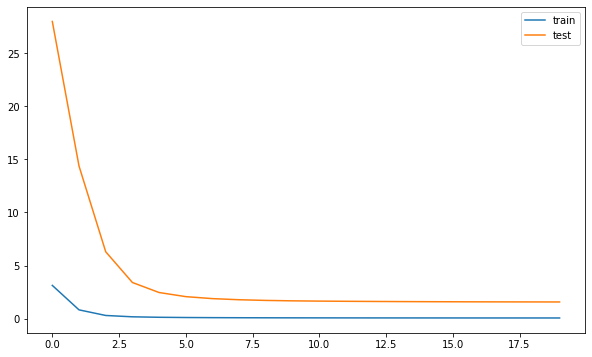

In [356]:
plt.plot(mse_train, label='train')
plt.plot(mse_test, label='test')
plt.legend()
plt.show()

In [357]:
U, V, mse_train, mse_test = pmf(X_train, X_test, d=100)

step 0:

step 1:
mean squared eroor train : 0.5065346616163793
mean squared eroor test : 13.51920975073526

step 2:
mean squared eroor train : 0.171951378786261
mean squared eroor test : 5.7031662456888546

step 3:
mean squared eroor train : 0.1005144959997835
mean squared eroor test : 3.5463413200680196

step 4:
mean squared eroor train : 0.0710199589581021
mean squared eroor test : 2.851617300476067

step 5:
mean squared eroor train : 0.057120484984599595
mean squared eroor test : 2.5097030314882307

step 6:
mean squared eroor train : 0.049494335946754384
mean squared eroor test : 2.290190696361038

step 7:
mean squared eroor train : 0.044828081073048795
mean squared eroor test : 2.1290187415090878

step 8:
mean squared eroor train : 0.041752927804221365
mean squared eroor test : 2.0028361078379184

step 9:
mean squared eroor train : 0.039615579366756484
mean squared eroor test : 1.9001915220564654

step 10:
mean squared eroor train : 0.038068199725157
mean squared eroor test : 1.815

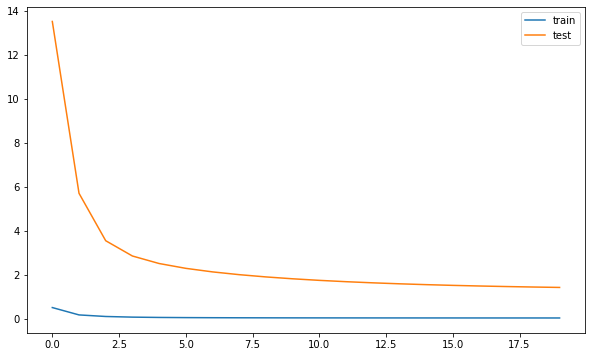

In [358]:
plt.plot(mse_train, label='train')
plt.plot(mse_test, label='test')
plt.legend()
plt.show()

In [359]:
U, V, mse_train, mse_test = pmf(X_train, X_test, d=200)

step 0:

step 1:
mean squared eroor train : 1.1301786358411188
mean squared eroor test : 11.183420429177458

step 2:
mean squared eroor train : 0.2600103999736664
mean squared eroor test : 5.092420786359096

step 3:
mean squared eroor train : 0.13920985153174692
mean squared eroor test : 3.9370405003710367

step 4:
mean squared eroor train : 0.09507332866900126
mean squared eroor test : 3.5318606455452315

step 5:
mean squared eroor train : 0.07365944559188463
mean squared eroor test : 3.2699432957896817

step 6:
mean squared eroor train : 0.06141995590182113
mean squared eroor test : 3.052511658372123

step 7:
mean squared eroor train : 0.05371185770694
mean squared eroor test : 2.85743813394926

step 8:
mean squared eroor train : 0.048538802272303665
mean squared eroor test : 2.6795623407458034

step 9:
mean squared eroor train : 0.0449077387499408
mean squared eroor test : 2.517308642897961

step 10:
mean squared eroor train : 0.042272516627647305
mean squared eroor test : 2.3705391

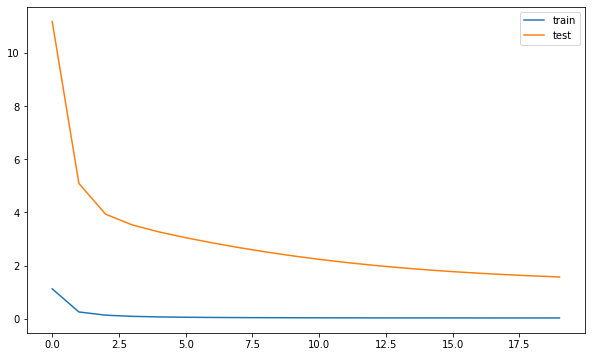

In [360]:
plt.plot(mse_train, label='train')
plt.plot(mse_test, label='test')
plt.legend()
plt.show()

Для вибраних d отримали найкраще значення mse на d = 100. Будемо змінювати інші параметри $\lambda, \sigma^2$ при такому d.

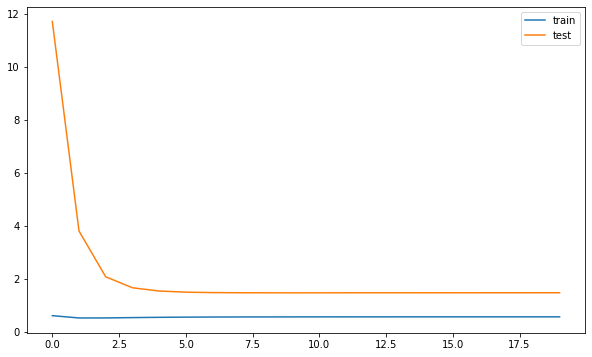

In [362]:
U, V, mse_train, mse_test = pmf(X_train, X_test, d=100, la=5, sig=1, verbose=False)
plt.plot(mse_train, label='train')
plt.plot(mse_test, label='test')
plt.legend()
plt.show()

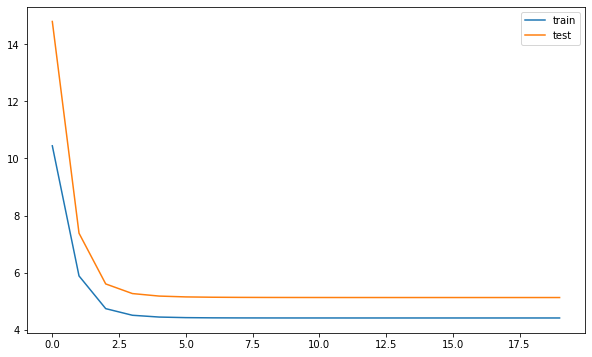

In [363]:
U, V, mse_train, mse_test = pmf(X_train, X_test, d=100, la=1, sig=5, verbose=False)
plt.plot(mse_train, label='train')
plt.plot(mse_test, label='test')
plt.legend()
plt.show()

Можна було б провести більше тестів, але мій ноутбук занадто сильно гріється, тому я зупинюсь на цьому. 
На даний момент найкращими виявилися параметри d=100, la=1, sig=1

### Висновок

Отже, ми імплементували pmf; зрозуміли, чому він працює; протестували алгоритм на даних, які до цього урізали, щоб зменшити їх розмір. 

Отримали найменше значення mse на тестовій вибірці для $d=100, \lambda=1, \sigma^2=1$. 